**Trabalho 2 - Introdução à Ciência de Dados**

**Análise Exploratória**

Sérgio Garcia Barbosa Filho - 493746

Dataset: Bungo_Data.csv (mesmo gerado no Trabalho 01)

**Blibliotecas Utilizadas:**

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import statsmodels.api as sm

**Visualização do CSV em formato de dataframe:**

In [359]:
#Ler o arquivo gerando um dataframe
df = pd.read_csv('Bungo_Data.csv')

#Exibir dataframe
df

,Unnamed: 0,id_jp,id_en,name,rarity,affinity,gender,affiliation,type,release_date_jp,release_date_en,hp_base,hp_max,atk_base,atk_max,avaliability
0,0,754,0738,Tachihara Michizou,UR,Dark,Male,Port Mafia,Support,2023-05-11 17:00,2023-05-11 08:00,1014,10617,218,2594,Awakening
1,1,753,0737,Nakajima Atsushi,SSR,Dark,Male,Armed Detective Agency,Defensive,2023-05-01 14:00,2023-05-01 05:00,1081,10482,192,1456,Scouts
2,2,752,0736,Herman M.,SR,Azure,Male,Guild,Support,2023-04-20 17:00,2023-04-20 08:00,676,4511,138,1082,Events
3,3,751,0735,Mark T.,SSR,Crimson,Male,Guild,Special,2023-04-20 17:00,2023-04-20 08:00,959,8938,183,1526,Scouts
4,4,750,0734,Louisa A.,SSR,Light,Female,Guild,Balanced,2023-04-20 17:00,2023-04-20 08:00,925,8272,189,1690,Scouts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,749,5,0005,Nakajima Atsushi,SSR,Crimson,Male,Armed Detective Agency,Offensive,?,?,848,6931,188,2005,Scouts
750,750,4,0004,Nakajima Atsushi,SR,Light,Male,Armed Detective Agency,Defensive,?,?,717,5378,130,779,Miscellaneous
751,751,3,0003,Nakajima Atsushi,SR,Azure,Male,Armed Detective Agency,Balanced,?,?,683,4754,137,963,Scouts
752,752,2,0002,Nakajima Atsushi,SR,Emerald,Male,Armed Detective Agency,Offensive,?,?,649,4130,144,1206,Scouts


Para este trabalho, os dados utilizados serão ATK e HP, para comparação, e RARITY e TYPE para agrupamento/classificação.

**1) Medidas de Tendência Central**

Para esta parte da atividade, será avaliado o ATK e HP máximos em três cenários:
- a) Todos os personagens;
- b) Considerando apenas os tipos (Type);
- c) Considerando a Raridade (Rarity).

Serão utilizados apenas estes, uma vez que são os únicos atributos que diferenciam os status dos personagens. Os valores de ATK e HP base não agregam valor para a análise, tendo em vista que os personagens são utilizados em seu potencial (nível) máximo.

**1.a) Médias e Medianas de HP e ATK considerando todos os personagens:**

In [360]:
print('TODOS OS PERSONAGENS')
print('\n----------HP----------')
print('Média de HP-MAX:', df['hp_max'].mean())
print('Mediana para HP-MAX:', df['hp_max'].median())

print('\n----------ATK----------')
print('Média de ATK-MAX:', df['atk_max'].mean())
print('Mediana para ATK-MAX:', df['atk_max'].median())



TODOS OS PERSONAGENS

----------HP----------
Média de HP-MAX: 6990.554376657825
Mediana para HP-MAX: 7696.0

----------ATK----------
Média de ATK-MAX: 1453.4058355437667
Mediana para ATK-MAX: 1460.0


**1.b) Médias e Medianas de HP e ATK classificando por tipo:**

In [361]:
print('----------------------------------------')
print('1 - OFFENSIVE')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['type'] == 'Offensive']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['type'] == 'Offensive']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['type'] == 'Offensive']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['type'] == 'Offensive']['atk_max'].median())

print('\n----------------------------------------')
print('2 - DEFENSIVE')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['type'] == 'Defensive']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['type'] == 'Defensive']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['type'] == 'Defensive']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['type'] == 'Defensive']['atk_max'].median())

print('\n----------------------------------------')
print('3 - BALANCED')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['type'] == 'Balanced']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['type'] == 'Balanced']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['type'] == 'Balanced']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['type'] == 'Balanced']['atk_max'].median())

print('\n----------------------------------------')
print('4 - SUPPORT')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['type'] == 'Support']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['type'] == 'Support']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['type'] == 'Support']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['type'] == 'Support']['atk_max'].median())

print('\n----------------------------------------')
print('5 - SPECIAL')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['type'] == 'Special']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['type'] == 'Special']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['type'] == 'Special']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['type'] == 'Special']['atk_max'].median())


----------------------------------------
1 - OFFENSIVE
----------------------------------------
          HP
Média de HP-MAX: 6333.802547770701
Mediana de HP-MAX: 7199.0

          ATK
Média de ATK-MAX: 1842.8789808917197
Mediana de ATK-MAX: 2091.0

----------------------------------------
2 - DEFENSIVE
----------------------------------------
          HP
Média de HP-MAX: 7875.449275362319
Mediana de HP-MAX: 9425.0

          ATK
Média de ATK-MAX: 1121.6304347826087
Mediana de ATK-MAX: 1361.0

----------------------------------------
3 - BALANCED
----------------------------------------
          HP
Média de HP-MAX: 6811.032258064516
Mediana de HP-MAX: 8272.0

          ATK
Média de ATK-MAX: 1384.5935483870967
Mediana de ATK-MAX: 1686.0

----------------------------------------
4 - SUPPORT
----------------------------------------
          HP
Média de HP-MAX: 6612.653333333334
Mediana de HP-MAX: 7696.0

          ATK
Média de ATK-MAX: 1614.12
Mediana de ATK-MAX: 1849.0

--------------

**1.c) Médias e Medianas de HP e ATK classificando por raridade:**

In [362]:
print('----------------------------------------')
print('1 - R')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['rarity'] == 'R']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['rarity'] == 'R']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['rarity'] == 'R']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['rarity'] == 'R']['atk_max'].median())

print('\n----------------------------------------')
print('2 - SR')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['rarity'] == 'SR']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['rarity'] == 'SR']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['rarity'] == 'SR']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['rarity'] == 'SR']['atk_max'].median())

print('\n----------------------------------------')
print('3 - SSR')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['rarity'] == 'SSR']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['rarity'] == 'SSR']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['rarity'] == 'SSR']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['rarity'] == 'SSR']['atk_max'].median())

print('\n----------------------------------------')
print('4 - EX')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['rarity'] == 'EX']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['rarity'] == 'EX']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['rarity'] == 'EX']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['rarity'] == 'EX']['atk_max'].median())

print('\n----------------------------------------')
print('5 - UR')
print('----------------------------------------')
print('          HP')
print('Média de HP-MAX:', df.loc[df['rarity'] == 'UR']['hp_max'].mean())
print('Mediana de HP-MAX:', df.loc[df['rarity'] == 'UR']['hp_max'].median())
print('\n          ATK')
print('Média de ATK-MAX:', df.loc[df['rarity'] == 'UR']['atk_max'].mean())
print('Mediana de ATK-MAX:', df.loc[df['rarity'] == 'UR']['atk_max'].median())

----------------------------------------
1 - R
----------------------------------------
          HP
Média de HP-MAX: 2542.757575757576
Mediana de HP-MAX: 2543.0

          ATK
Média de ATK-MAX: 516.1212121212121
Mediana de ATK-MAX: 495.0

----------------------------------------
2 - SR
----------------------------------------
          HP
Média de HP-MAX: 4740.10546875
Mediana de HP-MAX: 4754.0

          ATK
Média de ATK-MAX: 970.1875
Mediana de ATK-MAX: 963.0

----------------------------------------
3 - SSR
----------------------------------------
          HP
Média de HP-MAX: 8408.322505800465
Mediana de HP-MAX: 8361.0

          ATK
Média de ATK-MAX: 1749.8027842227377
Mediana de ATK-MAX: 1690.0

----------------------------------------
4 - EX
----------------------------------------
          HP
Média de HP-MAX: 8424.125
Mediana de HP-MAX: 8255.0

          ATK
Média de ATK-MAX: 2011.625
Mediana de ATK-MAX: 2065.5

----------------------------------------
5 - UR
----------------

**Análises iniciais:**
1. Por tipo:
- Personagens do tipo Offensive apresentam maiores médias de ATK e menores médias de HP;
- Personagens dos tipo Defensive apresentam maiores médias de HP e menores médias de ATK;
- Personagens do tipo Balanced equilibram os status de ATK e DEF quando comparados aos outros tipos, seria uma espécie de tipo "mediano";
- Personagens do tipo Special se destacam com seus valores de HP, enquanto os do tipo Support se destacam pelo ATK;
- Podemos observar que há uma grande variação de valores, analisando os valores das medianas. Isto é, alguns personagens apresentam valores muito baixos em relação a outros. Por hipótese, podemos dizer que isso se deve às raridades dos personagens. Que será analisado no tópico seguinte.

2. Por raridade:
- Quando analisada a raridade, os valores não apresentam muita variação. Ou seja, há uma maior uniformidade de valores (as médias se aproximam mais das medianas);
- Tanto para ATK, quanto para HP, os valores crescem de acordo com o crescimento da raridade (R->SR->SSR->EX->UR).

**2) Medidas de Variabilidade**

Assim como no tópico anterior, será avaliado a variabilidade do ATK e do HP máximos em três cenários:
- a) Todos os personagens;
- b) Considerando apenas os tipos (Type);
- c) Considerando a Raridade (Rarity).

Gerando partes de dataframes dos atributos (geral, por tipo e por raridade):

In [363]:
#Dataframes:
dfHPmax = df['hp_max'] #HP
dfATKmax = df['atk_max'] #ATK


#Por tipo:
dfHPmaxOf = df.loc[df['type'] == 'Offensive']['hp_max']
dfHPmaxDef = df.loc[df['type'] == 'Defensive']['hp_max']
dfHPmaxBal = df.loc[df['type'] == 'Balanced']['hp_max']
dfHPmaxSup = df.loc[df['type'] == 'Support']['hp_max']
dfHPmaxSpe = df.loc[df['type'] == 'Special']['hp_max']

dfATKmaxOf = df.loc[df['type'] == 'Offensive']['atk_max']
dfATKmaxDef = df.loc[df['type'] == 'Defensive']['atk_max']
dfATKmaxBal = df.loc[df['type'] == 'Balanced']['atk_max']
dfATKmaxSup = df.loc[df['type'] == 'Support']['atk_max']
dfATKmaxSpe = df.loc[df['type'] == 'Special']['atk_max']

#Por raridade:
dfHPmaxR = df.loc[df['rarity'] == 'R']['hp_max']
dfHPmaxSR = df.loc[df['rarity'] == 'SR']['hp_max']
dfHPmaxSSR = df.loc[df['rarity'] == 'SSR']['hp_max']
dfHPmaxEX = df.loc[df['rarity'] == 'EX']['hp_max']
dfHPmaxUR = df.loc[df['rarity'] == 'UR']['hp_max']

dfATKmaxR = df.loc[df['rarity'] == 'R']['atk_max']
dfATKmaxSR = df.loc[df['rarity'] == 'SR']['atk_max']
dfATKmaxSSR = df.loc[df['rarity'] == 'SSR']['atk_max']
dfATKmaxEX = df.loc[df['rarity'] == 'EX']['atk_max']
dfATKmaxUR = df.loc[df['rarity'] == 'UR']['atk_max']

Calculando as médias dos atributos:

In [364]:
#Medias gerais de HP e ATK
mediaHPmax = dfHPmax.mean() #HP
mediaATKmax = dfATKmax.mean() #ATK

#Por tipo:
mediaHPmaxOf = dfHPmaxOf.mean()
mediaHPmaxDef = dfHPmaxDef.mean()
mediaHPmaxBal = dfHPmaxBal.mean()
mediaHPmaxSup = dfHPmaxSup.mean()
mediaHPmaxSpe = dfHPmaxSpe.mean()

mediaATKmaxOf = dfATKmaxOf.mean()
mediaATKmaxDef = dfATKmaxDef.mean()
mediaATKmaxBal = dfATKmaxBal.mean()
mediaATKmaxSup = dfATKmaxSup.mean()
mediaATKmaxSpe = dfATKmaxSpe.mean()

#Por raridade:
mediaHPmaxR = dfHPmaxR.mean()
mediaHPmaxSR = dfHPmaxSR.mean()
mediaHPmaxSSR = dfHPmaxSSR.mean()
mediaHPmaxEX = dfHPmaxEX.mean()
mediaHPmaxUR = dfHPmaxUR.mean()

mediaATKmaxR = dfATKmaxR.mean()
mediaATKmaxSR = dfATKmaxSR.mean()
mediaATKmaxSSR = dfATKmaxSSR.mean()
mediaATKmaxEX = dfATKmaxEX.mean()
mediaATKmaxUR = dfATKmaxUR.mean()


**Exibir Tabelas de desvios:**

Nesta parte, para que o notebook não fique muito carregado ao executar, coloquei pra exibir apenas os valores para um dataframe dos gerados acima. Deixarei todos os desvios calculados, mas só mostrarei o geral, para ver os outros, basta mudar a variável mostrada.

In [365]:
#Calcular os desvios:
#Geral:
dfD_HP = dfHPmax.apply(lambda x: x - mediaHPmax)
dfD_ATK = dfATKmax.apply(lambda x: x - mediaATKmax)

#Por tipo:
dfD_HP_Of = dfHPmaxOf.apply(lambda x: x - mediaHPmaxOf)
dfD_HP_Def = dfHPmaxDef.apply(lambda x: x - mediaHPmaxDef)
dfD_HP_Bal = dfHPmaxBal.apply(lambda x: x - mediaHPmaxBal)
dfD_HP_Sup = dfHPmaxSup.apply(lambda x: x - mediaHPmaxSup)
dfD_HP_Spe = dfHPmaxSpe.apply(lambda x: x - mediaHPmaxSpe)

dfD_ATK_Of = dfATKmaxOf.apply(lambda x: x - mediaATKmaxOf)
dfD_ATK_Def = dfATKmaxDef.apply(lambda x: x - mediaATKmaxDef)
dfD_ATK_Bal = dfATKmaxBal.apply(lambda x: x - mediaATKmaxBal)
dfD_ATK_Sup = dfATKmaxSup.apply(lambda x: x - mediaATKmaxSup)
dfD_ATK_Spe = dfATKmaxSpe.apply(lambda x: x - mediaATKmaxSpe)

dfD_HP_R = dfHPmaxR.apply(lambda x: x - mediaHPmaxR)
dfD_HP_SR = dfHPmaxSR.apply(lambda x: x - mediaHPmaxSR)
dfD_HP_SSR = dfHPmaxSSR.apply(lambda x: x - mediaHPmaxSSR)
dfD_HP_EX = dfHPmaxEX.apply(lambda x: x - mediaHPmaxEX)
dfD_HP_UR = dfHPmaxUR.apply(lambda x: x - mediaHPmaxUR)

dfD_ATK_R = dfATKmaxR.apply(lambda x: x - mediaATKmaxR)
dfD_ATK_SR = dfATKmaxSR.apply(lambda x: x - mediaATKmaxSR)
dfD_ATK_SSR = dfATKmaxSSR.apply(lambda x: x - mediaATKmaxSSR)
dfD_ATK_EX = dfATKmaxEX.apply(lambda x: x - mediaATKmaxEX)
dfD_ATK_UR = dfATKmaxUR.apply(lambda x: x - mediaATKmaxUR)

print('Tabela de Desvios (HP):')
print(dfD_HP) #para ver as outras, basta mudar aqui :)
print()
print('Tabela de Desvios (ATK):')
print(dfD_ATK) #para ver as outras, basta mudar aqui :)

Tabela de Desvios (HP):
0      3626.445623
1      3491.445623
2     -2479.554377
3      1947.445623
4      1281.445623
          ...     
749     -59.554377
750   -1612.554377
751   -2236.554377
752   -2860.554377
753   -4736.554377
Name: hp_max, Length: 754, dtype: float64

Tabela de Desvios (ATK):
0      1140.594164
1         2.594164
2      -371.405836
3        72.594164
4       236.594164
          ...     
749     551.594164
750    -674.405836
751    -490.405836
752    -247.405836
753    -796.405836
Name: atk_max, Length: 754, dtype: float64


**Cálculo do Desvio Médio:**

Assim como no item acima, vou exibir apenas os valores gerais. Para calcular exibir os outros, basta substituir, na *função dm* (definida abaixo), as variáveis de dataframe e média correspondentes (o mesmo vai acontecer para os itens seguintes, por simplicidade :) ).

In [366]:
#Definir função para calcular o valor do Desvio médio:
def dm(dataFrame, mean): #dataframe, nome da coluna e a média
    dm = 0
    for i in range(len(dataFrame)):
        dm += abs((dataFrame.loc[i] - mean))
    dm = dm/len(dataFrame)
    return dm

In [367]:
print('Desvio de HP do dataframe analisado:', dm(dfHPmax, mediaHPmax))
print('Desvio de ATK do dataframe analisado:', dm(dfATKmax, mediaATKmax))

Desvio de HP do dataframe analisado: 1928.6722062351819
Desvio de ATK do dataframe analisado: 428.4984415566129


**Variância:**

In [368]:
#Definir variância:
print('Variância de HP do dataframe analisado:', dfHPmax.var())
print('Variância de ATK do dataframe analisado:', dfATKmax.var())

Variância de HP do dataframe analisado: 4887010.983095029
Variância de ATK do dataframe analisado: 258552.37159936732


**Desvio padrão:**

In [369]:
#Desvio padrão:
print('Desvio Padrão de HP do dataframe analisado:', dfHPmax.std())
print('Desvio Padrão de ATK do dataframe analisado:', dfATKmax.std())

Desvio Padrão de HP do dataframe analisado: 2210.658495357216
Desvio Padrão de ATK do dataframe analisado: 508.48045350767154


**3) Boxplot**

- HP Max por tipo:

<Axes: title={'center': 'hp_max'}, xlabel='type'>

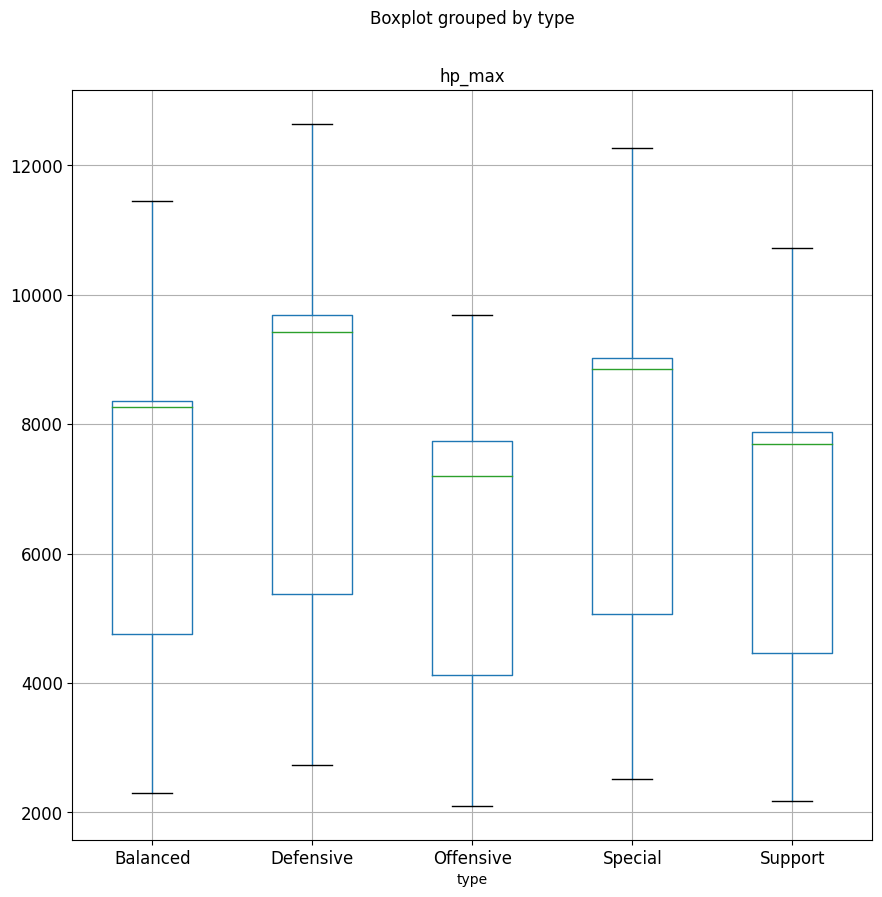

In [370]:
df.boxplot(by='type', column=['hp_max'], fontsize='large', figsize=(10,10))

- ATK Max por tipo:

<Axes: title={'center': 'atk_max'}, xlabel='type'>

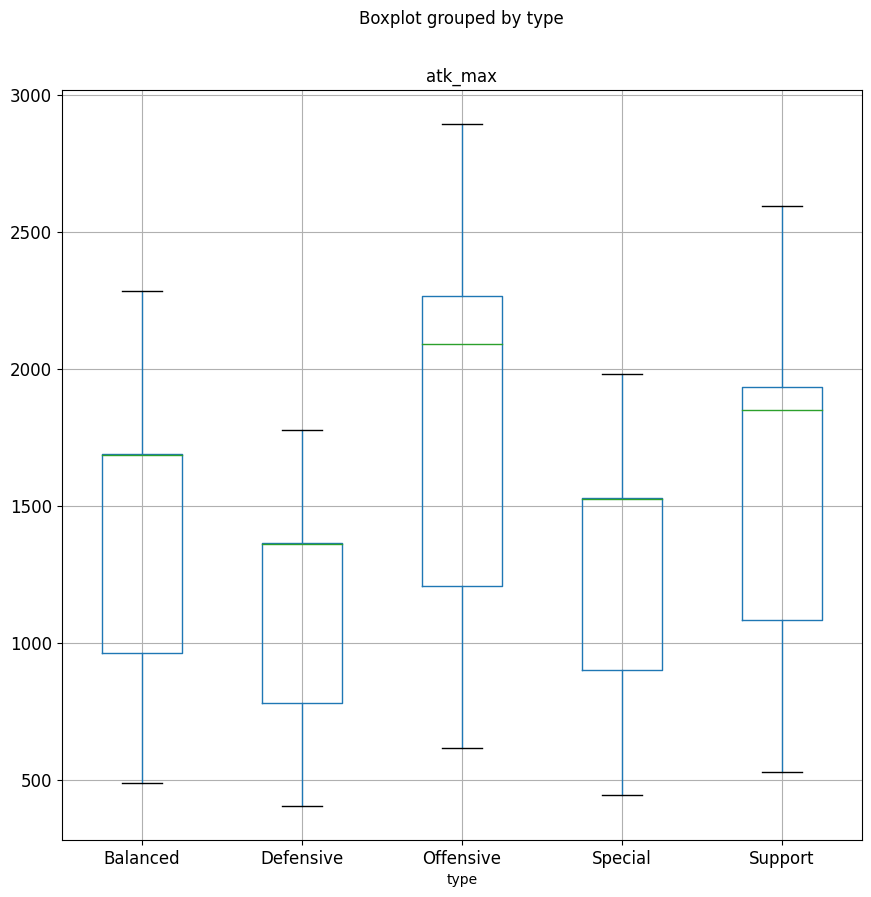

In [371]:
df.boxplot(by='type', column=['atk_max'], fontsize='large', figsize=(10,10))

- HP Max por raridade:

<Axes: title={'center': 'hp_max'}, xlabel='rarity'>

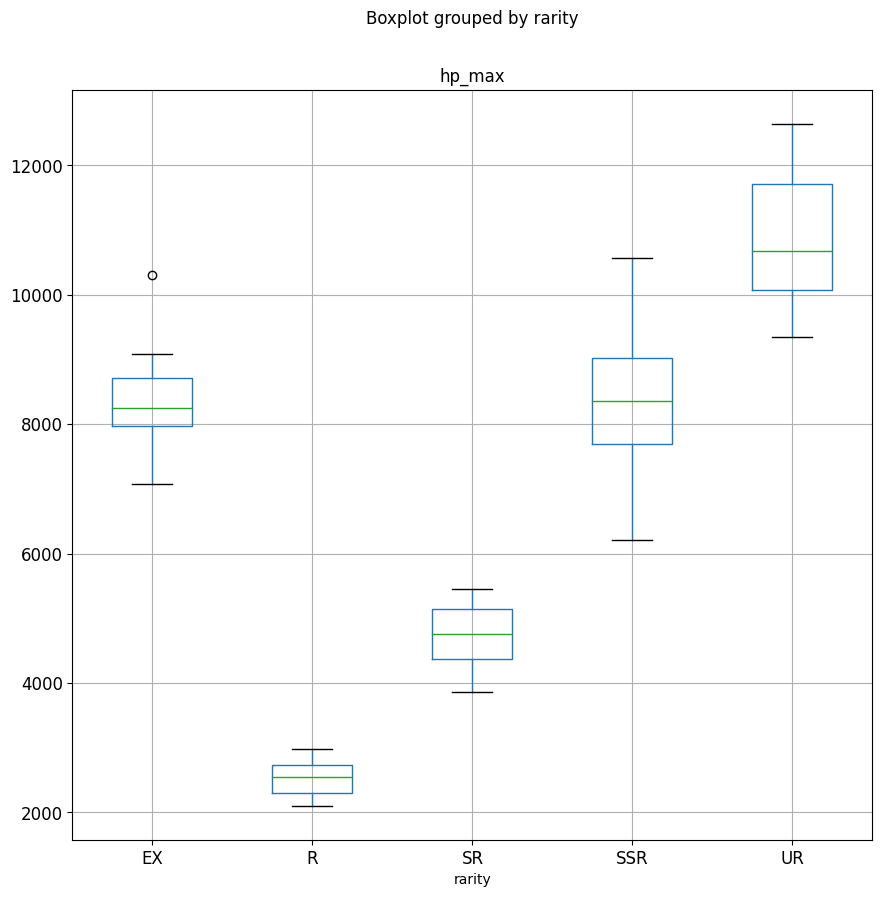

In [372]:
df.boxplot(by='rarity', column=['hp_max'], fontsize='large', figsize=(10,10))

- ATK Max por raridade:

<Axes: title={'center': 'atk_max'}, xlabel='rarity'>

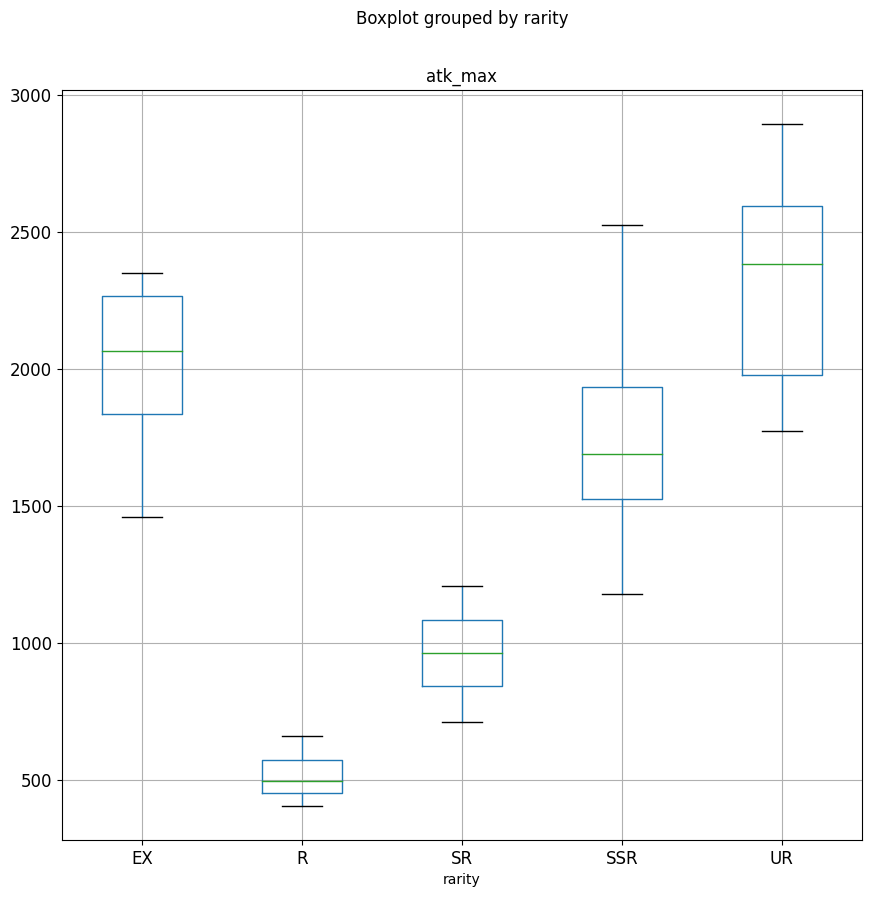

In [373]:
df.boxplot(by='rarity', column=['atk_max'], fontsize='large', figsize=(10,10))

**4) Tabela de Frequências:**

Para a tabela de frequências,por simplicidade, irei utilizar como base apenas os resultados gerais, ou seja, sem as classificações de tipo ou raridade. O processo será o mesmo se outros dados forem utilizados.

Para montar a tabela de frequência, utilizarei os atributos qualitativos raridade e tipo, mas serve para qulquer tipo de dado:

In [374]:
rarity_freq_table = df.groupby(['rarity']).size().reset_index(name='Fabs')
rarity_freq_table['Fac'] = rarity_freq_table['Fabs'].cumsum()
rarity_freq_table['Frac'] = rarity_freq_table['Fac']/rarity_freq_table['Fac'].max()
rarity_freq_table

,rarity,Fabs,Fac,Frac
0,EX,8,8,0.010610
1,R,33,41,0.054377
2,SR,256,297,0.393899
3,SSR,431,728,0.965517
4,UR,26,754,1.000000


In [375]:
type_freq_table = df.groupby(['type']).size().reset_index(name='Fabs')
# newcols = {0: 'Xi'}
# freq_table.rename(columns=newcols, inplace=True)
type_freq_table['Fac'] = type_freq_table['Fabs'].cumsum()
type_freq_table['Frac'] = type_freq_table['Fac']/type_freq_table['Fac'].max()
type_freq_table

,type,Fabs,Fac,Frac
0,Balanced,155,155,0.205570
1,Defensive,138,293,0.388594
2,Offensive,157,450,0.596817
3,Special,154,604,0.801061
4,Support,150,754,1.000000


**5) Histograma**

Calculando o número de binks (intervalos):

In [376]:
#Calculo do numero de binks:
k = math.ceil(1 + 3.3 * math.log10(df.size))
k

15

Plot dos Gráficos:

- Histograma para o HP:

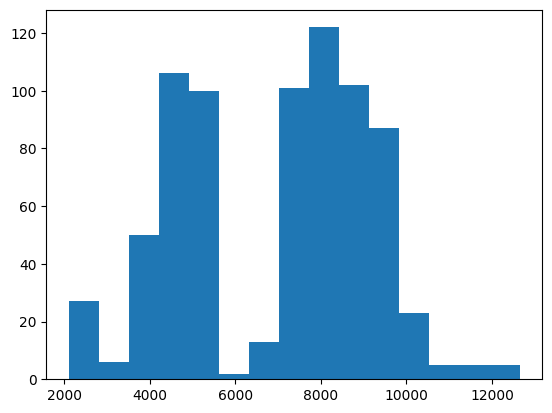

In [377]:
plt.hist(df['hp_max'], bins=k)
plt.show()

- Histograma para o ATK:

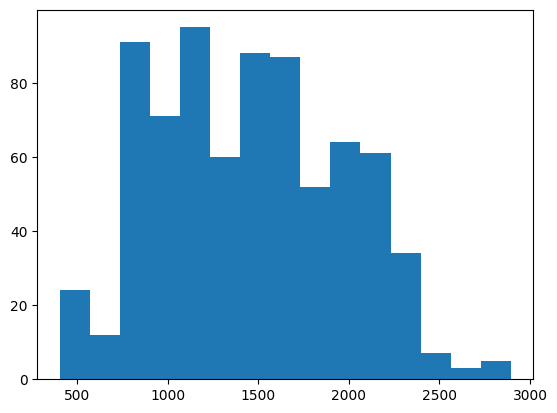

In [378]:
plt.hist(df['atk_max'], bins=k)
plt.show()

**6) QQ-Plot:**

Para o QQ-Plot, utilizei como base os dataframes de HP e ATK gerados anteriormente. Realizei o cálculo do zscore utilizando a biblioteca scipy. Por fim, fiz o plot do gráfico utilizando a biblioteca statsmodels.

In [379]:
HPzscore = scipy.stats.zscore(dfHPmax)
ATKzscore = scipy.stats.zscore(dfATKmax)

#Prints para conferências:
#print(HPzscore)
#print(ATKzscore)


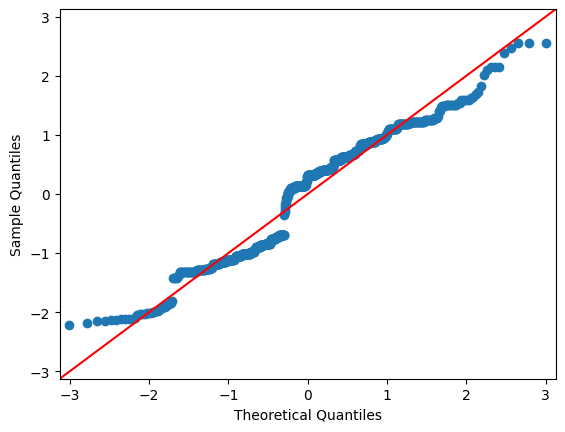

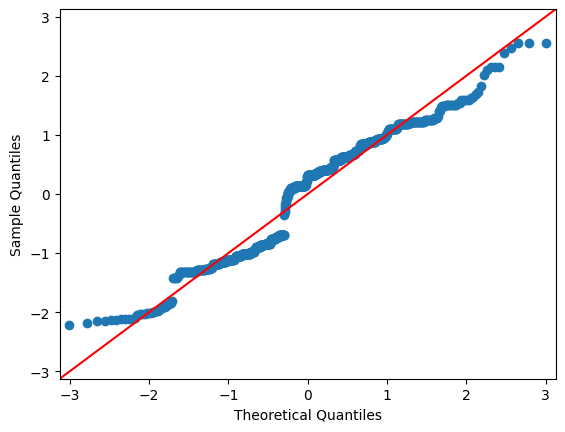

In [380]:
sm.qqplot(HPzscore, line='45')

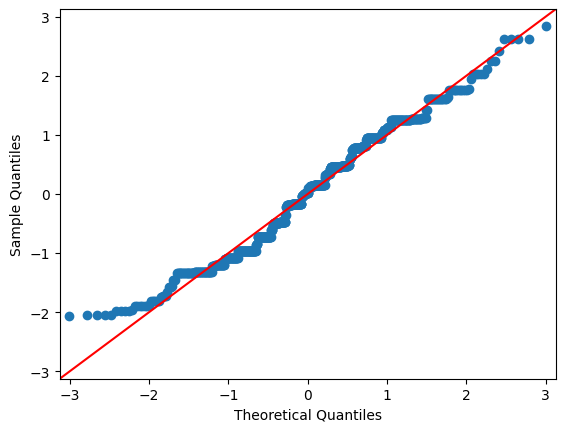

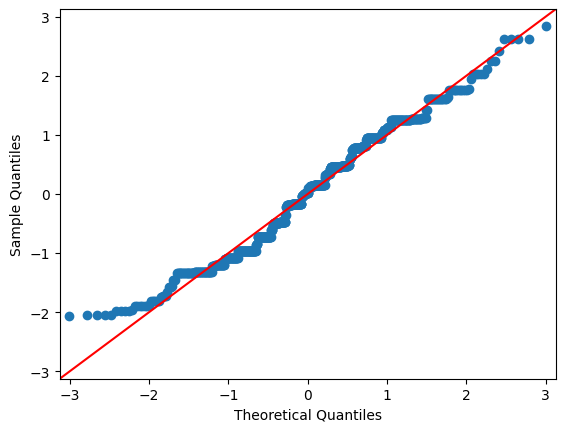

In [381]:
sm.qqplot(ATKzscore, line='45')